<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/Pima_Indians_Diabetes(NaN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터구성
*   Pregnancies : 임신횟수
*   Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
*   BloodPressure : 이완기 혈압
*   SkinThickness : 삼두근 피부 주름 두께, 체지방 추정 사용되는 값
*   Insulin : 2시간 혈청 인슐린
*   BMI : 체질량 지수
*   DiabetesPedigreeFunction : 당뇨병 혈통 기능
*   Age : 나이
*   Outcome: 768개 중 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0임







## 2. 필요한 라이브러리 로드

In [100]:
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. 데이터셋 로드

In [101]:
df = pd.read_csv("/content/drive/MyDrive/boostcourse_data/diabetes.csv")
df.shape

(768, 9)

In [102]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4, (추가) 수치형 변수를 범주형 변수로 만들기

In [103]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [104]:
#One-Hot-Encoding
# 수치>범주>수치
df['Age_low'] = df['Age'] <25
df['Age_middle'] = (df['Age']>= 25) & (df['Age']<=60)
df['Age_high'] = df['Age']>60
df[['Age','Age_low','Age_middle','Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_middle', ylabel='count'>

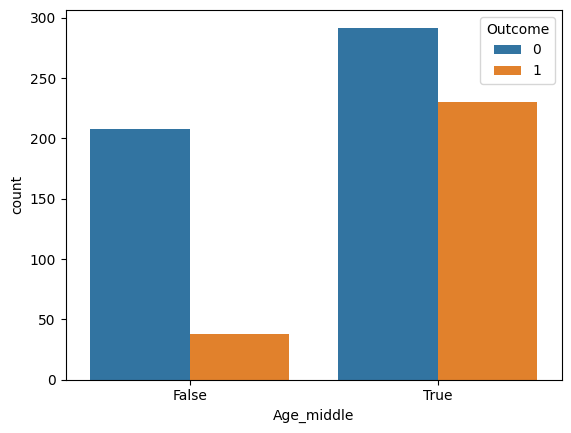

In [105]:
sns.countplot(data=df, x='Age_middle',hue='Outcome')

## (추가2) 결측치 다루기

In [106]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [107]:
df['Insulin_nan']= df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [108]:
df['Insulin_nan'].isnull().sum()

374

In [109]:
#결측치 비
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [110]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].mean()

<ipython-input-110-d3303b966d00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin','Insulin_nan'].mean()


,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [111]:
df.groupby(['Outcome']) ['Insulin', 'Insulin_nan'].agg(['mean','median'])

<ipython-input-111-4cd0ac51bf93>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome']) ['Insulin', 'Insulin_nan'].agg(['mean','median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [112]:
#결측치채우기
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 102.5
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 169.5

<ipython-input-113-2bee21657fb8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_nan'])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

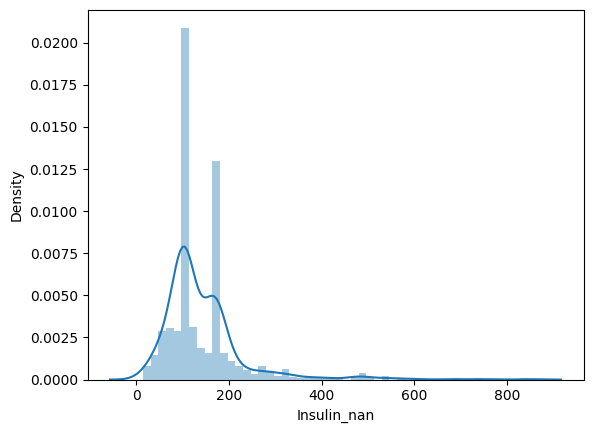

In [113]:
sns.distplot(df['Insulin_nan'])

<ipython-input-114-a5786bfb338e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])


<Axes: xlabel='Insulin_log', ylabel='Density'>

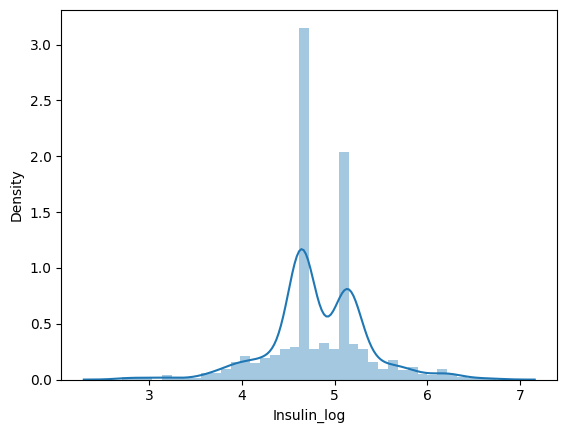

In [114]:
df['Insulin_log']= np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

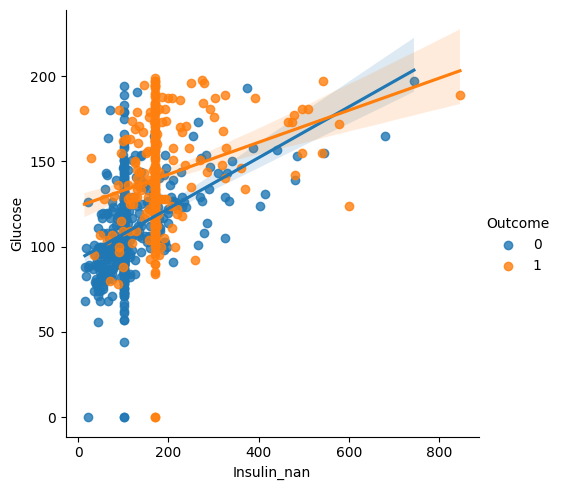

In [115]:
sns.lmplot(data=df, x='Insulin_nan', y= 'Glucose', hue= 'Outcome')

In [116]:
df['low_glu_insulin']= (df['Glucose'] <100) & (df['Insulin_nan']<= 102.5)
df['low_glu_insulin'].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [117]:
#crosstab은 범주형값에 대한 크로스테이블을 만들어주는것
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


### 이상치다루기

<Axes: >

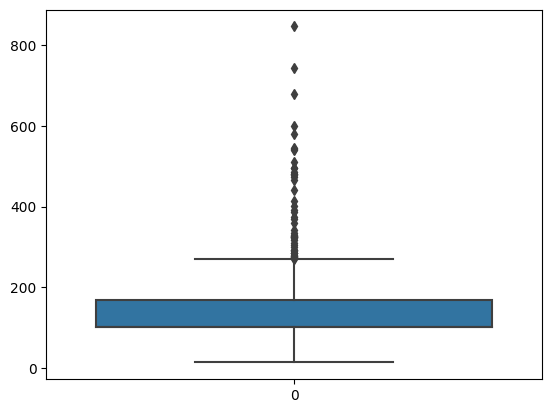

In [118]:
sns.boxplot(df['Insulin_nan'])

IQR(사분위수 범위) Q3-Q1을 계산하고
Q3 보다 1.5 IQR 이상 초과하는 값과 Q1보다 1.5IQR 이상 미달하는 값은 점이나 원, 별표등으로 따로 표시

In [119]:
IQR3= df['Insulin_nan'].quantile(0.75)
IQR1= df['Insulin_nan'].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [120]:
OUT = IQR3+ (IQR * 1.5)
OUT

270.0

In [121]:
df[df['Insulin_nan'] > OUT].shape
# 270을 초과하는 것이 51개나 되어 너무많음, 너무많은데이터 제거보다 600이상데이터삭제가 나아보

(51, 16)

In [122]:
df[df['Insulin_nan'] > 600].shape

(3, 16)

###(추가)Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Glucose','DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose','DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [99]:
#df[['Glucose','DiabetesPedigreeFunction']] = scale
#df[['Glucose','DiabetesPedigreeFunction']].head()

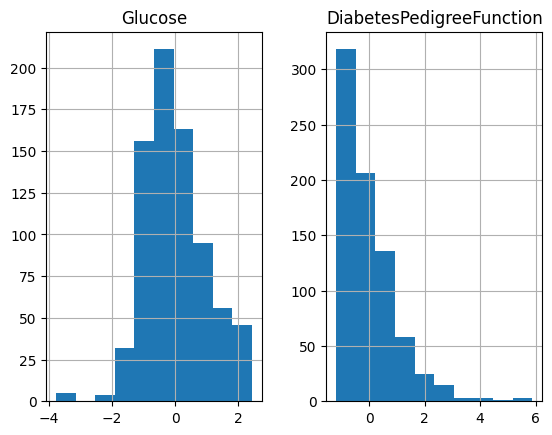

In [52]:
h = df[['Glucose','DiabetesPedigreeFunction']].hist()

In [125]:
#csv파일로 저장하기
df.to_csv('/content/drive/MyDrive/boostcourse_data/diabetes_feature.csv',index=False)

In [127]:
pd.read_csv('/content/drive/MyDrive/boostcourse_data/diabetes_feature.csv').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 5. 학습,예측 데이터셋 나누기

In [53]:
#8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담는다
split_count = int(df.shape[0] * 0.8)
split_count

614

In [54]:
#train,teset로 슬라이싱을 통해 데이터를 나눈다.
train = df[:split_count].copy()
train.shape

(614, 16)

In [55]:
###(추가) 인슐린이 600이하인 값을 확인
train[train['Insulin_nan'] < 600].shape

(610, 16)

In [56]:
###(추가)인슐린이 600이하인 값만 train값에 지정
train = train[train['Insulin_nan']<600]
train.shape

(610, 16)

In [57]:
test = df[split_count:].copy()
test.shape

(154, 16)

## 6. 학습,예측에 사용할 컬럼

In [58]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다. (outcome은 정답값으로 사용할것임)
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

## 7. 정답값이자 예측해야 될 값


In [59]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Outcome'
label_name

'Outcome'

feature_names는 여러개의 값을 가져올것이기에 리스트 형태로 만듬.

## 8. 학습,예측 데이터셋 만들기

In [60]:
#학습세트 만들기
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,False,102.5,True
2,1.943724,64,0,23.3,0.604397,32,True,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [61]:
#정답값을 만들어준다.
y_train =train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [62]:
#예측에 사용할 데이터세트만들기
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [63]:
#예측의 정답값
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 9. 머신러닝 알고리즘 가져오기

In [64]:
#당뇨인지 아닌지 분류기 때문에 Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 10. 학습(훈련)



In [65]:
#X_train 과 y_train을 학습시킴
model.fit(X_train,y_train)

DecisionTreeClassifier()

## 11.예측

In [66]:
y_predict = model.predict(X_test)

## 12.트리 알고리즘 분석하기

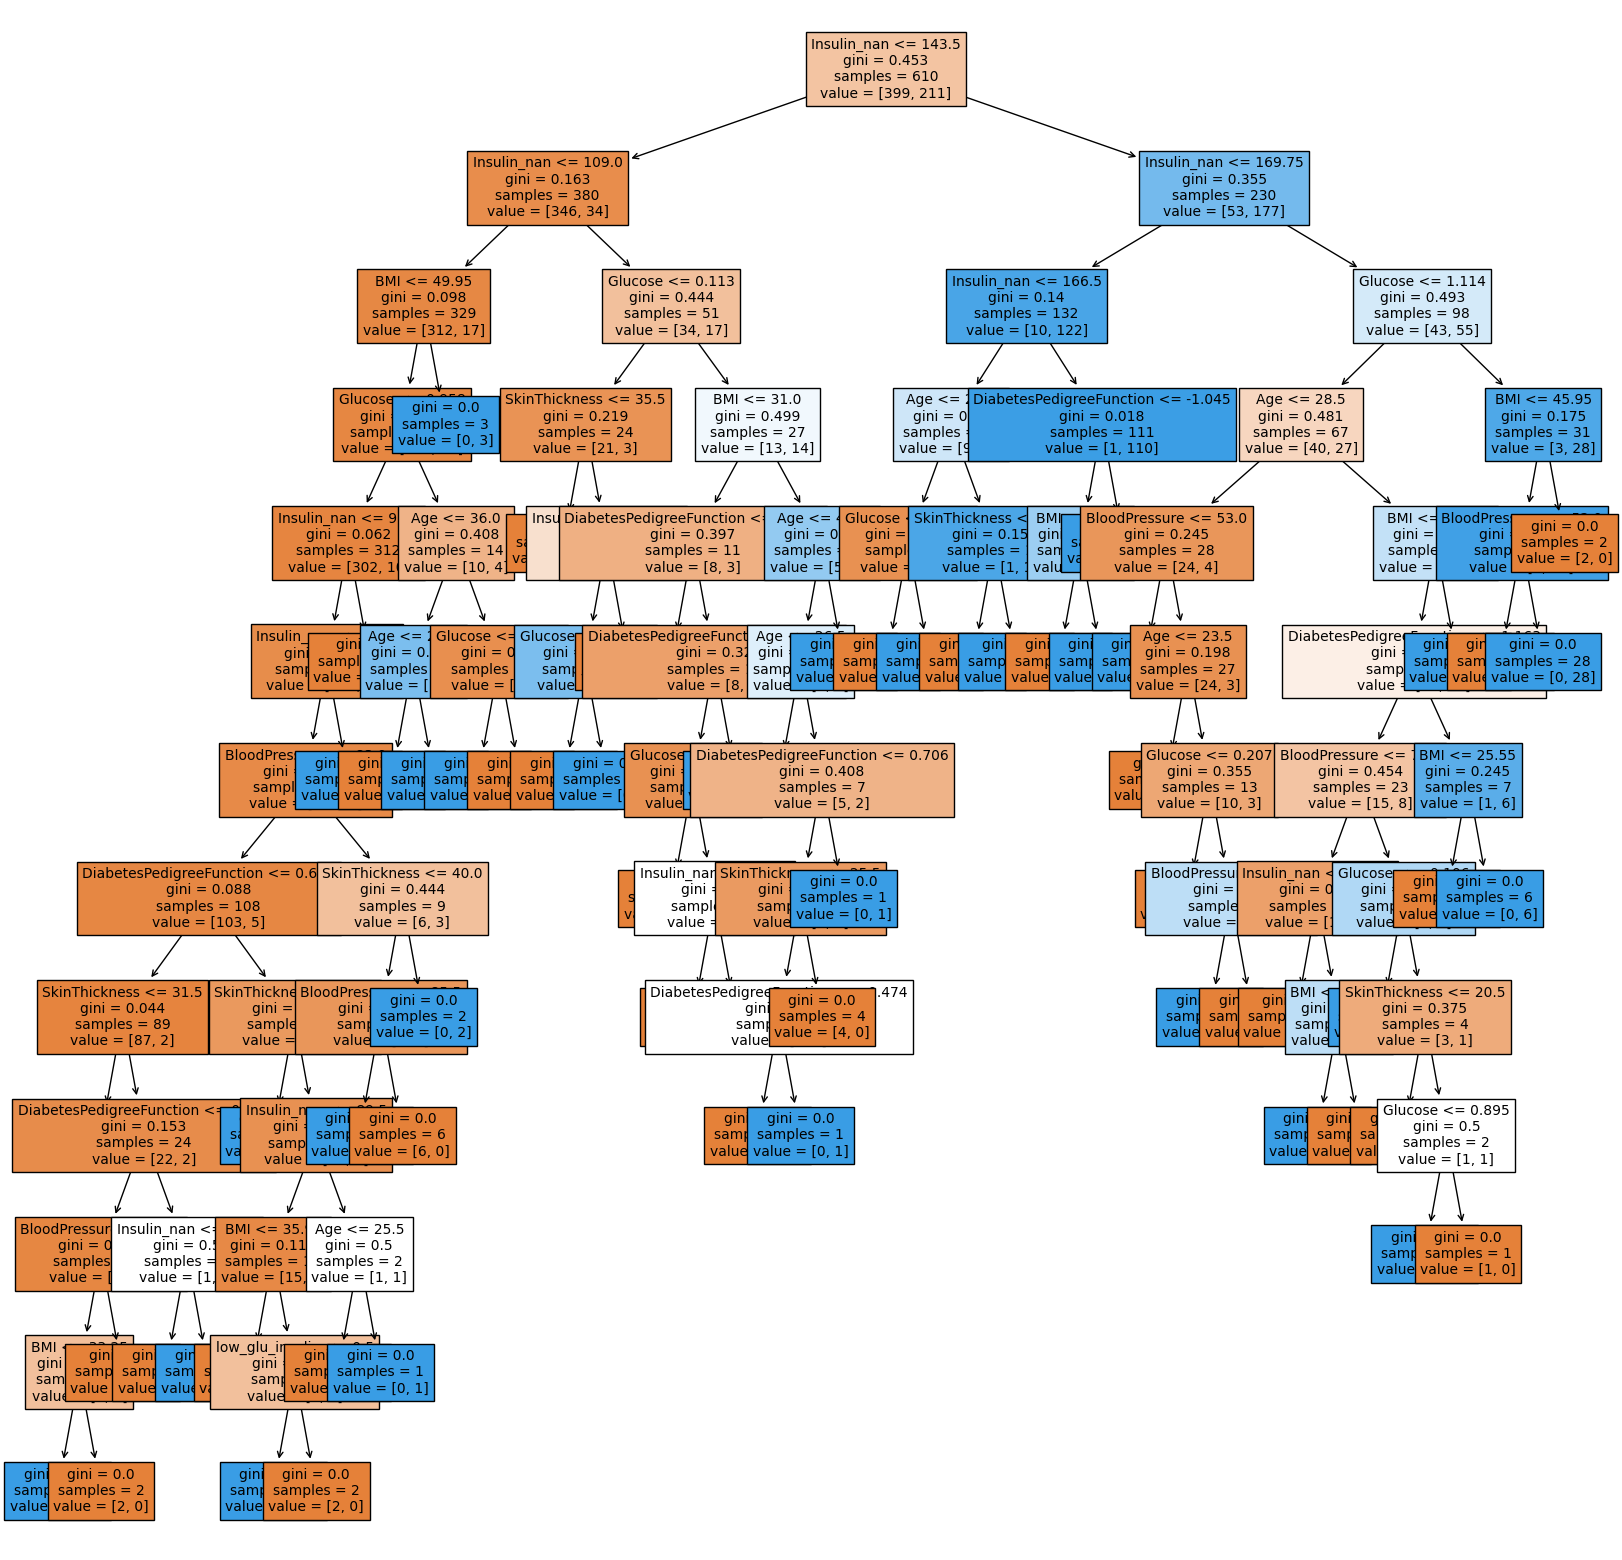

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

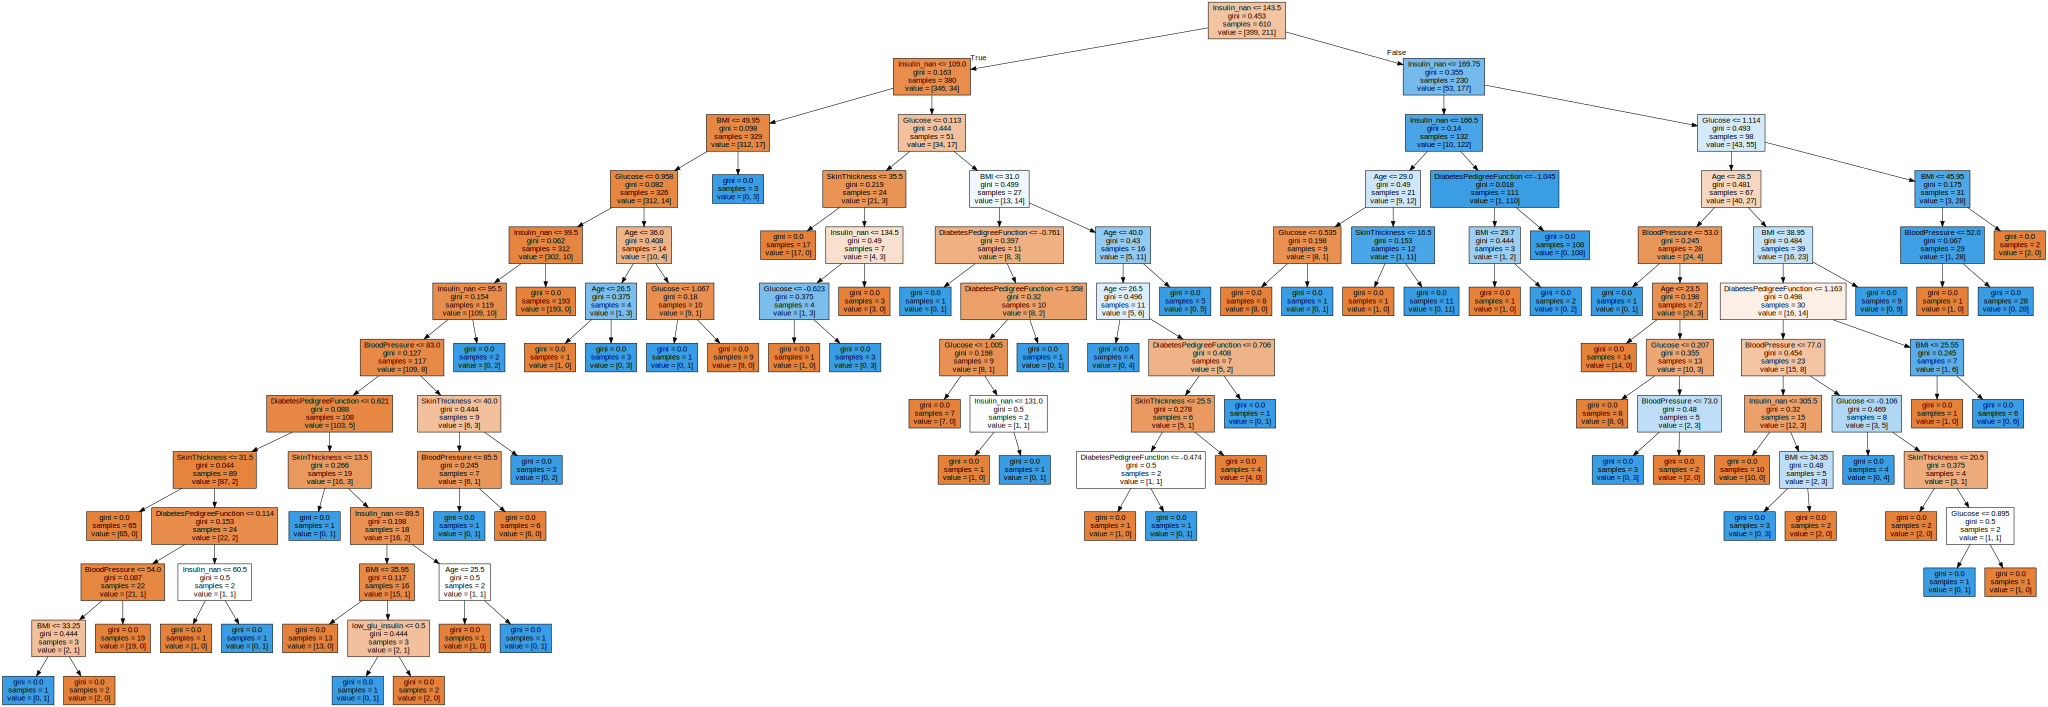

In [68]:
#graphviz를 통해 시각화
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names= feature_names, filled=True)
graphviz.Source(dot_tree)

In [69]:
#feature의 중요도를 추출
model.feature_importances_

array([0.09994423, 0.04129492, 0.03205333, 0.08128791, 0.03456557,
       0.08272508, 0.        , 0.62329857, 0.0048304 ])

<Axes: >

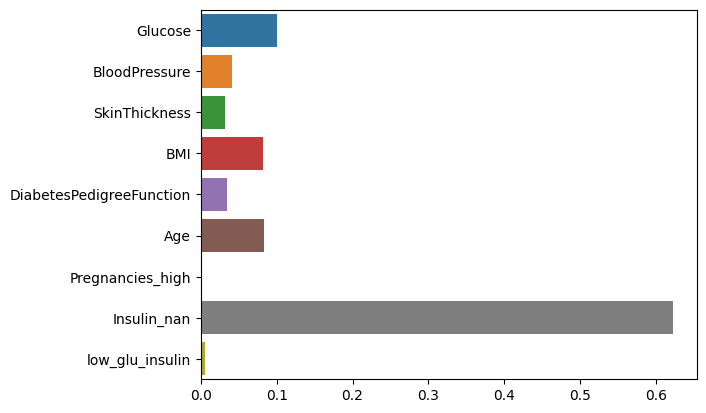

In [70]:
#feature의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names)

## 13. 정확도(Accuracy) 측정하기

In [71]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
#여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.

diff_count = abs(y_test - y_predict).sum()
diff_count

17

In [72]:
#예측의 정확도를 구하기,
(len(y_test)-diff_count) / len(y_test) *100

88.96103896103897

In [73]:
#구현된 알고리즘을 통해 정확도 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) *100

88.96103896103897

In [74]:
#model 의 score 로 점수를 계산
model.score(X_test, y_test)

0.8896103896103896

## One-Hot-Encoding을 통해 'Pregnancies'를 나누었을 때는 기존의 결과보다 향상되었으나, 'Age'를 25,60으로 low,middle,high로 나누었을땐 오히려 기존보다 하향된 정확도를 갖게 되었다.

##이후 Age를 기존으로 놓고, Insulin의 결측치를 mean값으로 대체한 결과 정확도가 눈에띄게 증가함을 확인 가능했다. 71점 > 85점

##이후 Insulin 결측치를 mean이 아닌 median으로 대체했을 때 87점으로 더 정확도가 높음을 확인했음.

## 추가적으로 Insulin_nan 에 log를 씌워 정규분포형태로 만들고 난 뒤 점수를 계산하니 89점으로 정확도가 더 향상됨을 확인함.

## 파생변수 low_glu_insulin은 정확도에 영향을 거의 끼치지 않은 것으로 확인